In [1]:
import os
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
import unicodedata
import spacy
import nltk
import re as regex
import contractions
import string
from nltk.corpus import stopwords, wordnet, words
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, RegexpTokenizer, sent_tokenize

# download en_core_web_lg
#!python -m spacy download en_core_web_sm

## **Text preprocessing**

In [3]:
# Load the annual report text files as corpus
def load_annual_reports(company_folder, base_filename):
    paths = [f"Dataset/Annual Reports txt Files/{company_folder}/{base_filename}{year}.txt" for year in ['20', '21', '22', '23', '24']]
    reports = []
    for path in paths:
        with open(path, "r", encoding="latin-1") as f:
            reports.append(f.read())
    return tuple(reports)

In [4]:
# Usage for Maersk:
maersk20, maersk21, maersk22, maersk23, maersk24 = load_annual_reports("A.P. Moeller Maersk", "maersk")

# Usage for Carlsberg:
carlsberg20, carlsberg21, carlsberg22, carlsberg23, carlsberg24 = load_annual_reports("Carlsberg Group", "carlsberg")

# Usage for Danske Bank:
danske20, danske21, danske22, danske23, danske24 = load_annual_reports("Danske Bank", "danske-bank")

# Usage for Novo Nordisk:
novo20, novo21, novo22, novo23, novo24 = load_annual_reports("Novo Nordisk", "novo")

# Usage for Orsted:
orsted20, orsted21, orsted22, orsted23, orsted24 = load_annual_reports("Orsted", "orsted")

In [5]:
# Usage of DSV:
dsv20, dsv21, dsv22, dsv23, dsv24 = load_annual_reports("DSV", "dsv")

# Usage of Pandora:
pandora20, pandora21, pandora22, pandora23, pandora24 = load_annual_reports("Pandora", "pandora")

# Usage of Danfoss:
danfoss20, danfoss21, danfoss22, danfoss23, danfoss24 = load_annual_reports("Danfoss", "danfoss")

# Usage of Lego:
lego20, lego21, lego22, lego23, lego24 = load_annual_reports("Lego", "lego")

# Usage of Genmab:
genmab20, genmab21, genmab22, genmab23, genmab24 = load_annual_reports("Genmab", "genmab")

In [6]:
# Usage of Nilfisk:
nilfisk20, nilfisk21, nilfisk22, nilfisk23, nilfisk24 = load_annual_reports("Nilfisk", "nilfisk")

# Usage of Salling Group:
salling20, salling21, salling22, salling23, salling24 = load_annual_reports("Salling Group", "salling")

# Usage of BESTSELLER:
bestseller20, bestseller21, bestseller22, bestseller23, bestseller24 = load_annual_reports("Bestseller", "bestseller")

# Usage of Novonesis:
novonesis20, novonesis21, novonesis22, novonesis23, novonesis24 = load_annual_reports("Novonesis", "novonesis")

# Usage of TDC:
tdc20, tdc21, tdc22, tdc23, tdc24 = load_annual_reports("TDC Group", "tdc")

In [7]:
# Usage of Coloplast:
coloplast20, coloplast21, coloplast22, coloplast23, coloplast24 = load_annual_reports("Coloplast", "coloplast")

# Usage of Vestas:
vestas20, vestas21, vestas22, vestas23, vestas24 = load_annual_reports("Vestas", "vestas")

# Usage of Tryg:
tryg20, tryg21, tryg22, tryg23, tryg24 = load_annual_reports("Tryg", "tryg")

# Usage of ISS:
iss20, iss21, iss22, iss23, iss24 = load_annual_reports("ISS", "iss")

# Usage of Jyske Bank:
jyske20, jyske21, jyske22, jyske23, jyske24 = load_annual_reports("Jyske Bank", "jyske")

In [8]:
# Set stopwords to the words in the txt file
new_stopwords = 'Wordlist/stopwords.txt'
with open(new_stopwords, 'r') as f:
    new_stopwords = [word.strip() for line in f for word in line.split()]
new_stopwords = set(new_stopwords)
new_stopwords

{'a,',
 'about,',
 'after,',
 'again,',
 'all,',
 'am,',
 'an,',
 'and,',
 'any,',
 'are,',
 'as,',
 'at,',
 'be,',
 'because,',
 'been,',
 'before,',
 'being,',
 'between,',
 'both,',
 'by',
 'can,',
 'did,',
 'didn,',
 'do,',
 'does,',
 'doing,',
 'during,',
 'each,',
 'for,',
 'from,',
 'had,',
 'has,',
 'have,',
 'haven,',
 'having,',
 "he'd,",
 'he,',
 'her,',
 'here,',
 'hers,',
 'herself,',
 'him,',
 'himself,',
 'his,',
 'how,',
 "i'll,",
 'i,',
 'if,',
 'in,',
 'into,',
 'is,',
 'it,',
 'its,',
 'itself,',
 'just,',
 'ma,',
 'me,',
 'mightn,',
 'more,',
 'most,',
 'my,',
 'myself,',
 'not,',
 'now,',
 'of,',
 'on,',
 'once,',
 'only,',
 'or,',
 'other,',
 'our,',
 'ours,',
 'ourselves,',
 'out,',
 're,',
 's,',
 'same,',
 'shan,',
 'she,',
 'should,',
 'shouldn,',
 'so,',
 'some,',
 'such,',
 'than,',
 'that,',
 'the,',
 'their,',
 'theirs,',
 'them,',
 'themselves,',
 'then,',
 'there,',
 'these,',
 'they,',
 'this,',
 'those,',
 'through,',
 'to,',
 'too,',
 'under,',
 'unti

### NLTK Preprocess

In [9]:
class LexiconTextNormalizer:
    def __init__(self):
        self.stopwords = new_stopwords
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = PorterStemmer()
        self.wn = nltk.corpus.wordnet
        self.nlp = spacy.load('en_core_web_sm')

    def normalize(self, text, rm_stopwords=True, rm_special_chars=True, expand_cont=True, 
                  case_convert=True, lemmatize=True, stem=False, remove_numbers=True,
                  remove_accented_chars=True, scrub_words=True):
        if not isinstance(text, str):
            raise ValueError("Input text must be a string")
        
        if case_convert:
            text = self.case_convert(text, True)
        else:
            text = self.case_convert(text, False)
        if remove_numbers:
            text = self.remove_numbers(text)
        if expand_cont:
            text = self.expand_contractions(text)
        if remove_accented_chars:
            text = self.remove_accented_chars(text)
        if scrub_words:
            text = self.scrub_words(text)
        if rm_stopwords:
            text = self.remove_stopwords(text)
        if lemmatize:
            text = self.lemmatize_text(text)
        if stem:
            text = self.stem_text(text)
        if rm_special_chars:    
            text = self.remove_special_characters(text)
        
        return text
        
    def case_convert(self, text, lower=True):
        if lower:
            return text.lower()
        else:
            return text.upper()

    def tokenize_text(self, text):
        words = nltk.word_tokenize(text)
        tokens = [word.strip() for word in words]
        return tokens

    def remove_numbers(self, text):
        text = re.sub(r'\d+', '', text)
        return text

    def remove_stopwords(self, text):
        tokens = self.tokenize_text(text)
        filter_tokens  = [token for token in tokens if token not in self.stopwords]
        text= ' '.join(filter_tokens)
        return text

    def remove_special_characters(self, text):
        tokens = self.tokenize_text(text)
        pattern = regex.compile('[{}]'.format(regex.escape(string.punctuation)))
        filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
        filtered_text = ' '.join(filtered_tokens)
        return filtered_text
    
    def remove_accented_chars(self, text):
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        return text

    def expand_contractions(self, text):
        return contractions.fix(text)

    def lemmatize_text(self, text):
        doc = self.nlp(text)
        lemmatized = [token.lemma_ for token in doc]
        return ' '.join(lemmatized)
    
    def stem_text(self, text):
        tokens = self.tokenize_text(text)
        stemmed_tokens = [self.stemmer.stem(token) for token in tokens]
        stemmed_text = ' '.join(stemmed_tokens)
        return stemmed_text

    def scrub_words(self, text):
        # Replace \xa0 characters in text
        text = re.sub(r'\xa0', ' ', text)

        # Replace non ascii / not words and digits
        text = re.sub(r"([^\w\d])", ' ', text)

        # Replace new line characters and following text until space
        text = re.sub(r'\n(\w*?)[\s]', '', text)

        # Remove html markup
        text = re.sub(r"<.*?>", ' ', text)

        # Remove extra spaces from the text
        text = re.sub(r"\s+", ' ', text)

        return text

In [10]:
# Apply LexiconTextNormalizer to a single string (e.g., maersk20)
normalizer = LexiconTextNormalizer()
maersk20_norm = normalizer.normalize(maersk20, rm_stopwords=True, rm_special_chars=True, expand_cont=True, 
                                     case_convert=True, lemmatize=True, stem=False, 
                                     remove_numbers=True, remove_accented_chars=True, scrub_words=True)
print(maersk20_norm)

the transformation of a p moller maersk from a diversified conglomerate to a focused and integrated global logistic company be well under way a p moller maersk today offer a broad and global portfolio of logistic product from ocean and air transport to inland transportation warehousing and distribution include cold storage custom service and lead logistic product such as supply chain management service and e com fulfilment as well as container port service and towage our strategy be build on three core element firstly we offer our customer end to end digitally enable transport and logistic service that help they manage their supply chain sell their product globally and source from the most competitive supplier worldwide for we to deliver superior value to our customer we have build our land base logistic and service offering in a way that seamlessly integrate with our strong leading and sustainable ocean business this enable we to leverage the commercial synergy inherent in sell land b

In [11]:
def normalize_reports(company, normalizer):
    for year in ['20', '21', '22', '23', '24']:
        raw_var = f"{company}{year}"
        norm_var = f"{company}{year}_norm"
        corpus_raw = globals()[raw_var]
        globals()[norm_var] = normalizer.normalize(
            corpus_raw,
            rm_stopwords=True, rm_special_chars=True, expand_cont=True,
            case_convert=True, lemmatize=True, stem=False,
            remove_numbers=True, remove_accented_chars=True, scrub_words=True
        )

In [12]:
normalize_reports("maersk", normalizer)
normalize_reports("carlsberg", normalizer)
normalize_reports("danske", normalizer)
normalize_reports("novo", normalizer)
normalize_reports("orsted", normalizer)

normalize_reports("dsv", normalizer)
normalize_reports("pandora", normalizer)
normalize_reports("danfoss", normalizer)
normalize_reports("lego", normalizer)
normalize_reports("genmab", normalizer)

normalize_reports("nilfisk", normalizer)
normalize_reports("salling", normalizer)
normalize_reports("tdc", normalizer)
normalize_reports("bestseller", normalizer)
normalize_reports("novonesis", normalizer)

normalize_reports("coloplast", normalizer)
normalize_reports("vestas", normalizer)
normalize_reports("tryg", normalizer)
normalize_reports("iss", normalizer)
normalize_reports("jyske", normalizer)

In [13]:
companies = ['maersk', 'carlsberg', 'danske', 'novo', 'orsted',
             'dsv', 'pandora', 'danfoss', 'lego', 'genmab',
             'coloplast', 'vestas', 'tryg', 'iss', 'jyske', 
             'nilfisk', 'salling', 'bestseller', 'novonesis', 'tdc']
years = ['20', '21', '22', '23', '24']

for company in companies:
    for year in years:
        norm_var = f"{company}{year}_norm"
        tokens_var = f"{company}{year}_tokens"
        # Use nltk word_tokenize for better handling, or .split() for whitespace tokens
        globals()[tokens_var] = nltk.word_tokenize(globals()[norm_var])

In [14]:
maersk20_tokens

['the',
 'transformation',
 'of',
 'a',
 'p',
 'moller',
 'maersk',
 'from',
 'a',
 'diversified',
 'conglomerate',
 'to',
 'a',
 'focused',
 'and',
 'integrated',
 'global',
 'logistic',
 'company',
 'be',
 'well',
 'under',
 'way',
 'a',
 'p',
 'moller',
 'maersk',
 'today',
 'offer',
 'a',
 'broad',
 'and',
 'global',
 'portfolio',
 'of',
 'logistic',
 'product',
 'from',
 'ocean',
 'and',
 'air',
 'transport',
 'to',
 'inland',
 'transportation',
 'warehousing',
 'and',
 'distribution',
 'include',
 'cold',
 'storage',
 'custom',
 'service',
 'and',
 'lead',
 'logistic',
 'product',
 'such',
 'as',
 'supply',
 'chain',
 'management',
 'service',
 'and',
 'e',
 'com',
 'fulfilment',
 'as',
 'well',
 'as',
 'container',
 'port',
 'service',
 'and',
 'towage',
 'our',
 'strategy',
 'be',
 'build',
 'on',
 'three',
 'core',
 'element',
 'firstly',
 'we',
 'offer',
 'our',
 'customer',
 'end',
 'to',
 'end',
 'digitally',
 'enable',
 'transport',
 'and',
 'logistic',
 'service',
 'that'

## **Lexicon Based Feature Extracting**

In [15]:
loughran_macdonald = pd.read_csv("Wordlist/Loughran-McDonald_MasterDictionary_1993-2024.csv")
loughran_macdonald.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86553 entries, 0 to 86552
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Word                86552 non-null  object 
 1   Seq_num             86553 non-null  int64  
 2   Word Count          86553 non-null  int64  
 3   Word Proportion     86553 non-null  float64
 4   Average Proportion  86553 non-null  float64
 5   Std Dev             86553 non-null  float64
 6   Doc Count           86553 non-null  int64  
 7   Negative            86553 non-null  int64  
 8   Positive            86553 non-null  int64  
 9   Uncertainty         86553 non-null  int64  
 10  Litigious           86553 non-null  int64  
 11  Strong_Modal        86553 non-null  int64  
 12  Weak_Modal          86553 non-null  int64  
 13  Constraining        86553 non-null  int64  
 14  Complexity          86553 non-null  int64  
 15  Syllables           86553 non-null  int64  
 16  Sour

In [16]:
loughran_macdonald.head()

,Word,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Complexity,Syllables,Source
0,AARDVARK,1,755,2.955070e-08,1.945421e-08,4.078069e-06,140,0,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.174200e-10,8.060019e-12,8.919011e-09,1,0,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,9,3.522600e-10,1.089343e-10,5.105359e-08,7,0,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,29,1.135060e-09,6.197922e-10,1.539279e-07,28,0,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,9620,3.765268e-07,3.825261e-07,3.421836e-05,1295,0,0,0,0,0,0,0,0,3,12of12inf


In [17]:
def extract_lexicon_features(tokens, lexicon_df):
    lexicon_words = set(lexicon_df['Word']) # Set for quick lookup
    matched_tokens = [tok.upper() for tok in tokens if tok.upper() in lexicon_words] # Only keep tokens present in lexicon
    counts = Counter(matched_tokens)
    
    # Prepare lookups for each feature
    feature_cols = [
        'Positive', 'Negative', 'Uncertainty', 'Litigious', 'Strong_Modal',
        'Weak_Modal', 'Constraining', 'Complexity', 'Syllables'
    ]

    features = {col.lower() + '_score': 0 for col in feature_cols}
    word_count = 0
    complex_word_count = 0
    complex_words = set(lexicon_df[lexicon_df['Complexity'] > 0]['Word']) if 'Complexity' in lexicon_df.columns else set()
    
    for word, cnt in counts.items():
        row = lexicon_df[lexicon_df['Word'] == word]
        if not row.empty:
            for col in feature_cols:
                if col in row:
                    features[col.lower() + '_score'] += int(row.iloc[0][col]) * cnt
            word_count += cnt
            if word in complex_words:
                complex_word_count += cnt
    
    # Compose observation as a dict
    obs = {
        **features,
        'word_count': word_count,
        'complex_word_count': complex_word_count,
        'percentage_of_complex_words': complex_word_count / word_count if word_count > 0 else 0
    }
    return obs

### Running the cellblock below takes between 1-2 minutes

In [18]:
obs_rows = []

for company in companies:
    for year in years:
        tokens_var = f"{company}{year}_tokens"
        # Check if variable exists to avoid NameError
        if tokens_var in globals():
            tokens = globals()[tokens_var]
            df_row = extract_lexicon_features(tokens, loughran_macdonald)
            df_row['company_year'] = f"{company}{year}"
            obs_rows.append(df_row)

df = pd.DataFrame(obs_rows)
# Set company_year as first column
df = df[['company_year'] + [col for col in df.columns if col != 'company_year']]
df.tail(10)

,company_year,positive_score,negative_score,uncertainty_score,litigious_score,strong_modal_score,weak_modal_score,constraining_score,complexity_score,syllables_score,word_count,complex_word_count,percentage_of_complex_words
90,novonesis20,62257,28126,10045,2011,16072,8036,4018,4046,2039,1229,2,0.001627
91,novonesis21,84367,10045,12054,0,28126,4018,12054,20230,2429,1521,10,0.006575
92,novonesis22,102437,12054,6027,2009,22099,2009,10045,10115,2630,1525,5,0.003279
93,novonesis23,122527,12043,6027,2011,30135,2009,6027,14161,2357,1354,7,0.005170
94,novonesis24,42189,4018,2009,2009,2009,0,6027,4046,883,526,2,0.003802
95,tdc20,18081,1998,4018,0,0,0,0,0,627,372,0,0.000000
96,tdc21,16072,6016,2009,4018,4018,0,2009,2023,814,477,1,0.002096
97,tdc22,28126,1987,2009,0,4018,0,6027,0,814,456,0,0.000000
98,tdc23,30113,8025,6027,0,14063,0,10045,2023,1180,684,1,0.001462
99,tdc24,68284,12043,2009,2009,10045,0,10045,2023,1491,811,1,0.001233


In [19]:
df.shape

(100, 13)

In [20]:
df['polarity_score'] = df['positive_score'] - df['negative_score']
for col in ['positive', 'negative', 'uncertainty', 'constraining']:
    df[f'{col}_word_proportion'] = df[f'{col}_score'] / df['word_count'].replace(0, 1)
df.head()

,company_year,positive_score,negative_score,uncertainty_score,litigious_score,strong_modal_score,weak_modal_score,constraining_score,complexity_score,syllables_score,word_count,complex_word_count,percentage_of_complex_words,polarity_score,positive_word_proportion,negative_word_proportion,uncertainty_word_proportion,constraining_word_proportion
0,maersk20,128532,16061,18081,2009,14063,10045,18081,30345,3538,2050,15,0.007317,112471,62.698537,7.834634,8.820000,8.820000
1,maersk21,82358,28126,10045,6027,14063,6027,20092,14161,2854,1649,7,0.004245,54232,49.944209,17.056398,6.091571,12.184354
2,maersk22,16072,32144,4018,2009,8036,2009,2009,20230,1360,825,10,0.012121,-16072,19.481212,38.962424,4.870303,2.435152
3,maersk23,62268,20057,8036,6027,4018,4018,10047,20230,1787,1011,10,0.009891,42211,61.590504,19.838773,7.948566,9.937685
4,maersk24,84378,26095,18081,4018,6027,4018,4018,8092,1600,897,4,0.004459,58283,94.066890,29.091416,20.157191,4.479376


In [21]:
# add new columns called financial_outlook and fill it with NaNs
df['financial_outlook'] = pd.NA
#  make it the first column
df = df[['financial_outlook'] + [col for col in df.columns if col != 'financial_outlook']]
df.head()

,financial_outlook,company_year,positive_score,negative_score,uncertainty_score,litigious_score,strong_modal_score,weak_modal_score,constraining_score,complexity_score,syllables_score,word_count,complex_word_count,percentage_of_complex_words,polarity_score,positive_word_proportion,negative_word_proportion,uncertainty_word_proportion,constraining_word_proportion
0,<NA>,maersk20,128532,16061,18081,2009,14063,10045,18081,30345,3538,2050,15,0.007317,112471,62.698537,7.834634,8.820000,8.820000
1,<NA>,maersk21,82358,28126,10045,6027,14063,6027,20092,14161,2854,1649,7,0.004245,54232,49.944209,17.056398,6.091571,12.184354
2,<NA>,maersk22,16072,32144,4018,2009,8036,2009,2009,20230,1360,825,10,0.012121,-16072,19.481212,38.962424,4.870303,2.435152
3,<NA>,maersk23,62268,20057,8036,6027,4018,4018,10047,20230,1787,1011,10,0.009891,42211,61.590504,19.838773,7.948566,9.937685
4,<NA>,maersk24,84378,26095,18081,4018,6027,4018,4018,8092,1600,897,4,0.004459,58283,94.066890,29.091416,20.157191,4.479376


In [22]:
# Assign the 2024 outlooks based on your the categories
outlook_2024 = {
    'carlsberg24': 1,
    'orsted24': 0,
    'novo24': 2,
    'maersk24': 1,
    'danske24': 2,
    'dsv24': 1,
    'pandora24': 1,
    'danfoss24': 2,
    'lego24': 1,
    'genmab24': 2,
    'coloplast24': 2,
    'vestas24': 2,
    'tryg24': 2,
    'iss24': 2,
    'jyske24': 2,
    'salling24': 2,
    'nilfisk24': 1,
    'tdc24': 1,
    'bestseller24': 1,
    'novonesis24': 1
}

for company_year, value in outlook_2024.items():
    df.loc[df['company_year'] == company_year, 'financial_outlook'] = value


In [23]:
outlook_2023 = {
    'maersk23': 1,
    'carlsberg23': 2,
    'danske23': 2,
    'novo23': 2,
    'orsted23': 0,
    'dsv23': 1,
    'pandora23': 2,
    'danfoss23': 2,
    'lego23': 2,
    'genmab23': 2,
    'coloplast23': 2,
    'vestas23': 2,
    'tryg23': 2,
    'iss23': 2,
    'jyske23': 2,
    'salling23': 2,
    'nilfisk23': 1,
    'tdc23': 2,
    'bestseller23': 1,
    'novonesis23': 2
}
for company_year, value in outlook_2023.items():
    df.loc[df['company_year'] == company_year, 'financial_outlook'] = value

In [24]:
outlook_2022 = {
    'maersk22': 2,
    'carlsberg22': 2,
    'danske22': 2,
    'novo22': 1,
    'orsted22': 2,
    'dsv22': 2,
    'pandora22': 2,
    'danfoss22': 2,
    'lego22': 2,
    'genmab22': 2,
    'coloplast22': 2,
    'vestas22': 1,
    'tryg22': 2,
    'iss22': 2,
    'jyske22': 2,
    'salling22': 2,
    'nilfisk22': 2,
    'tdc22': 1,
    'bestseller22': 2,
    'novonesis22': 2,
}

# Fill in the values for 2024
for company_year, value in outlook_2022.items():
    df.loc[df['company_year'] == company_year, 'financial_outlook'] = value

In [25]:
outlook_2021 = {
    'maersk21': 2,
    'carlsberg21': 2,
    'danske21': 1,
    'novo21': 2,
    'orsted21': 2,
    'dsv21': 2,
    'pandora21': 2,
    'danfoss21': 2,
    'lego21': 2,
    'genmab21': 2,
    'coloplast21': 2,
    'vestas21': 1,
    'tryg21': 2,
    'iss21': 1,
    'jyske21': 2,
    'salling21': 1,
    'nilfisk21': 1,
    'tdc21': 1,
    'bestseller21': 2,
    'novonesis21': 2
}
# Fill in the values for 2024
for company_year, value in outlook_2021.items():
    df.loc[df['company_year'] == company_year, 'financial_outlook'] = value

In [26]:
outlook_2020 = {
    'maersk20': 2,
    'carlsberg20': 1,
    'danske20': 0,
    'novo20': 2,
    'orsted20': 2,
    'dsv20': 2,
    'pandora20': 1,
    'danfoss20': 1,
    'lego20': 2,
    'genmab20': 2,
    'coloplast20': 2,
    'vestas20': 2,
    'tryg20': 2,
    'iss20': 1,
    'jyske20': 1,
    'salling20': 2,
    'nilfisk20': 0,
    'tdc20': 1,
    'bestseller20': 1,
    'novonesis20': 2
}
# Fill in the values for 2024
for company_year, value in outlook_2020.items():
    df.loc[df['company_year'] == company_year, 'financial_outlook'] = value
df.head()

,financial_outlook,company_year,positive_score,negative_score,uncertainty_score,litigious_score,strong_modal_score,weak_modal_score,constraining_score,complexity_score,syllables_score,word_count,complex_word_count,percentage_of_complex_words,polarity_score,positive_word_proportion,negative_word_proportion,uncertainty_word_proportion,constraining_word_proportion
0,2,maersk20,128532,16061,18081,2009,14063,10045,18081,30345,3538,2050,15,0.007317,112471,62.698537,7.834634,8.820000,8.820000
1,2,maersk21,82358,28126,10045,6027,14063,6027,20092,14161,2854,1649,7,0.004245,54232,49.944209,17.056398,6.091571,12.184354
2,2,maersk22,16072,32144,4018,2009,8036,2009,2009,20230,1360,825,10,0.012121,-16072,19.481212,38.962424,4.870303,2.435152
3,1,maersk23,62268,20057,8036,6027,4018,4018,10047,20230,1787,1011,10,0.009891,42211,61.590504,19.838773,7.948566,9.937685
4,1,maersk24,84378,26095,18081,4018,6027,4018,4018,8092,1600,897,4,0.004459,58283,94.066890,29.091416,20.157191,4.479376


In [27]:
# count how many instances of each financial outlook there are
outlook_counts = df['financial_outlook'].value_counts()
print(outlook_counts)

financial_outlook
2    67
1    29
0     4
Name: count, dtype: int64


## **Applying Machine Learning Algorithms**

In [28]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, StratifiedShuffleSplit, GridSearchCV
import xgboost as xgb
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.svm import SVC

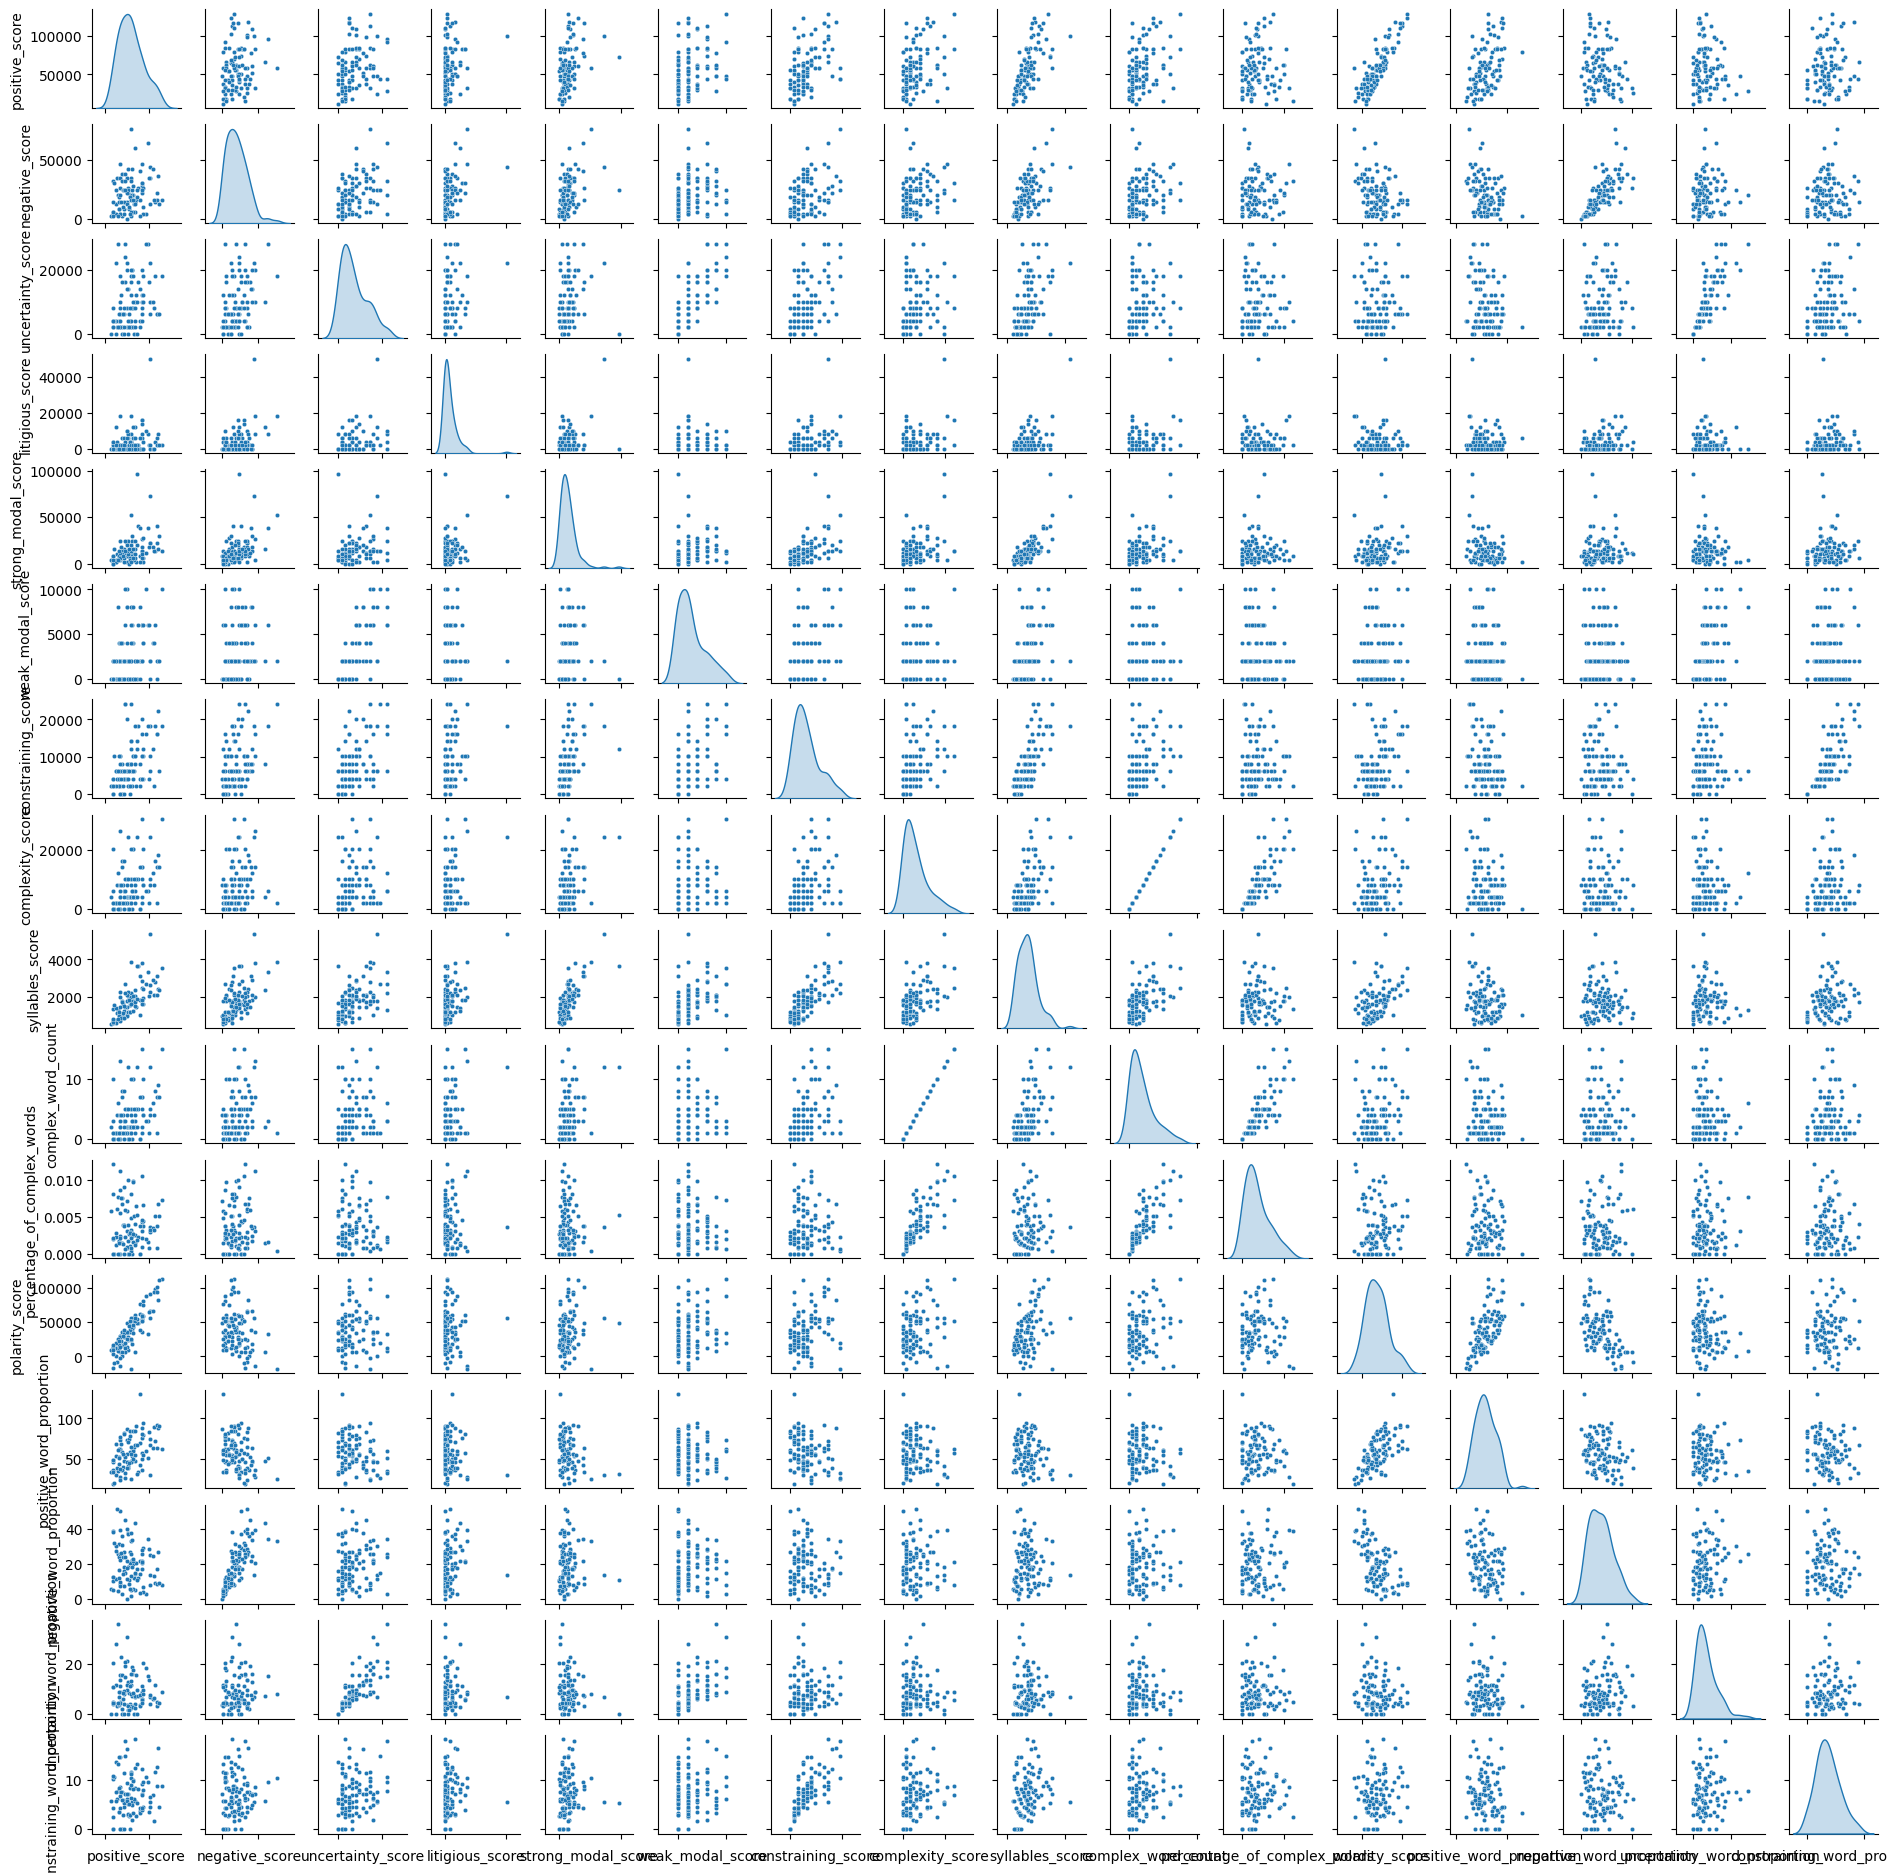

In [29]:
features = [
    u'positive_score', u'negative_score', u'uncertainty_score', u'litigious_score',
    u'strong_modal_score', u'weak_modal_score', u'constraining_score', u'complexity_score',
    u'syllables_score', u'complex_word_count', u'percentage_of_complex_words',
    u'polarity_score', u'positive_word_proportion', u'negative_word_proportion',
    u'uncertainty_word_proportion', u'constraining_word_proportion'
]

# Pairplot over these features for your (shuffled/split) training data
g = sns.pairplot(
    df[features],
    diag_kind="kde",
    plot_kws=dict(s=10),
    diag_kws=dict(fill=True),        
    height=1.2
)
g.set(xticklabels=[])
plt.show()

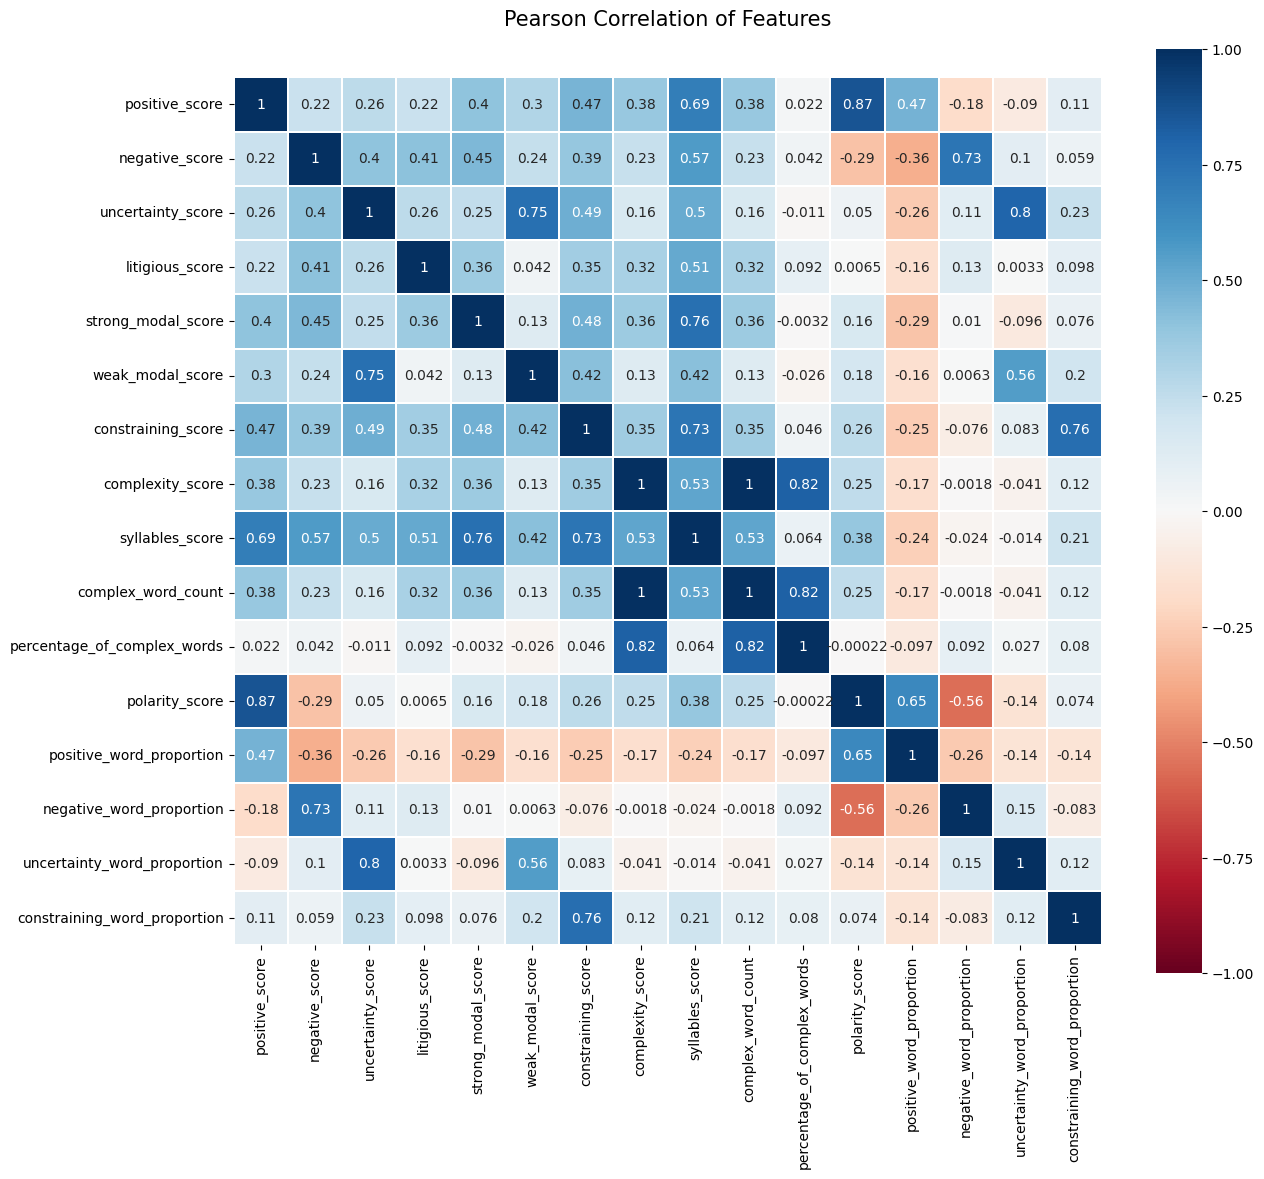

In [30]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(
    df[features].astype(float).corr(),
    linewidths=0.1, vmin=-1, vmax=1, square=True, cmap=colormap,
    linecolor='white', annot=True
)
plt.show()

### Handle class-imbalance

In [31]:
# Scale the features
scaler = StandardScaler()
X = df[features].dropna()
X_scaled = scaler.fit_transform(X)
y = df['financial_outlook']

print(X_scaled.shape, y.shape)  # Both should be (25, N) and (25,), for example

(100, 16) (100,)


In [32]:
# Check original class distribution
print("Original class distribution:")
print(Counter(y))
print(f"Original dataset shape: {Counter(y)}")

Original class distribution:
Counter({2: 67, 1: 29, 0: 4})
Original dataset shape: Counter({2: 67, 1: 29, 0: 4})


In [33]:
# Check the current state of y
print("Current y values and type:")
print(f"y dtype: {y.dtype}")
print(f"Unique values in y: {y.unique()}")
print(f"Any NaN values: {y.isna().sum()}")

Current y values and type:
y dtype: object
Unique values in y: [2 1 0]
Any NaN values: 0


In [34]:
y_clean = y.astype(int)

In [35]:
# Apply ADASYN to balance the classes
adasyn = ADASYN(random_state=42, n_neighbors=3)  # Using n_neighbors=3 due to small class 0 size

# Fit and transform the training data
X_balanced, y_balanced = adasyn.fit_resample(X_scaled, y_clean)

print("\nAfter ADASYN balancing:")
print(Counter(y_balanced))
print(f"New dataset shape: {X_balanced.shape}")


After ADASYN balancing:
Counter({0: 68, 2: 67, 1: 65})
New dataset shape: (200, 16)


In [36]:
# Shuffle and split into train, val, test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X_balanced, y_balanced, 
    train_size=0.70,  # ~140-150 samples
    random_state=42, 
    shuffle=True, 
    stratify=y_balanced
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5,  # Split remaining 30% equally: 15% val, 15% test
    random_state=42, 
    shuffle=True, 
    stratify=y_temp
)

# Check sizes
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(140, 16) (30, 16) (30, 16)
(140,) (30,) (30,)


In [37]:
print(y_train)
print(y_train.dtype)
print(np.unique(y_train))

150    0
108    0
115    0
44     1
126    0
      ..
12     2
33     2
123    0
161    0
164    1
Name: financial_outlook, Length: 140, dtype: int64
int64
[0 1 2]


In [38]:
# Writing a function for plotting curves 

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.1,1.0,10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<div class="alert alert-block alert-info" align=center><b></b>
    
# **Building models** 

## **Logistic Regression**

In [39]:
#create an instance and fit the model 
logmodel = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the model to the training data
logmodel.fit(X_train, y_train)

#making predictions on the train & validation 
log_train_pred = logmodel.predict(X_train)
log_val_pred = logmodel.predict(X_val)

# Prediction on the test data 
log_test_pred = logmodel.predict(X_test)
# Print classification report for train and test sets
print("Logistic Regression - Train Classification Report:")
print(classification_report(y_train, log_train_pred, digits=4))
print("Logistic Regression - Test Classification Report:")
print(classification_report(y_test, log_test_pred, digits=4))

Logistic Regression - Train Classification Report:
              precision    recall  f1-score   support

           0     0.9057    1.0000    0.9505        48
           1     0.7317    0.6667    0.6977        45
           2     0.6957    0.6809    0.6882        47

    accuracy                         0.7857       140
   macro avg     0.7777    0.7825    0.7788       140
weighted avg     0.7792    0.7857    0.7812       140

Logistic Regression - Test Classification Report:
              precision    recall  f1-score   support

           0     0.9091    1.0000    0.9524        10
           1     0.6364    0.7000    0.6667        10
           2     0.6250    0.5000    0.5556        10

    accuracy                         0.7333        30
   macro avg     0.7235    0.7333    0.7249        30
weighted avg     0.7235    0.7333    0.7249        30



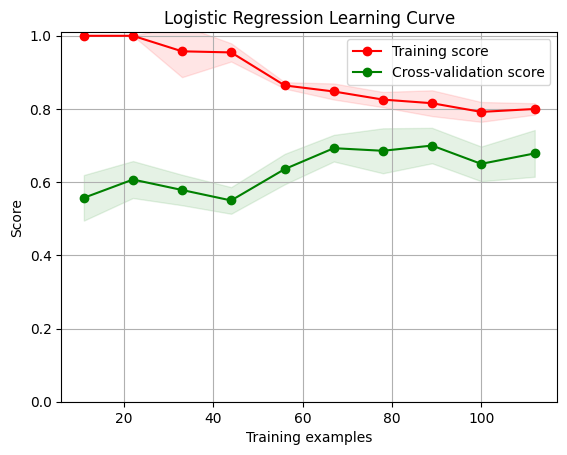

In [40]:
# apply learning curve function
plot_learning_curve(
    logmodel, 
    "Logistic Regression Learning Curve", 
    X_train, y_train, 
    ylim=(0.0, 1.01), 
    cv=StratifiedKFold(n_splits=5), 
    n_jobs=-1
)
plt.show()

## **Gaussian NB**

In [41]:
#instantiating a object
clf = GaussianNB()
#fit on train data 
clf.fit(X_train,y_train)

#make prediction on train & validation 
true_pred = clf.predict(X_train)
val_pred = clf.predict(X_val)

#making prediction on test data 
Naive_predictions = clf.predict(X_test)

# Print classification report for train and test sets
print("Naive Bayes - Train Classification Report:")
print(classification_report(y_train, true_pred, digits=4))
print("Naive Bayes - Test Classification Report:")
print(classification_report(y_test, Naive_predictions, digits=4))

Naive Bayes - Train Classification Report:
              precision    recall  f1-score   support

           0     0.7872    0.7708    0.7789        48
           1     0.5217    0.5333    0.5275        45
           2     0.5957    0.5957    0.5957        47

    accuracy                         0.6357       140
   macro avg     0.6349    0.6333    0.6341       140
weighted avg     0.6376    0.6357    0.6366       140

Naive Bayes - Test Classification Report:
              precision    recall  f1-score   support

           0     0.8889    0.8000    0.8421        10
           1     0.4545    0.5000    0.4762        10
           2     0.4000    0.4000    0.4000        10

    accuracy                         0.5667        30
   macro avg     0.5811    0.5667    0.5728        30
weighted avg     0.5811    0.5667    0.5728        30



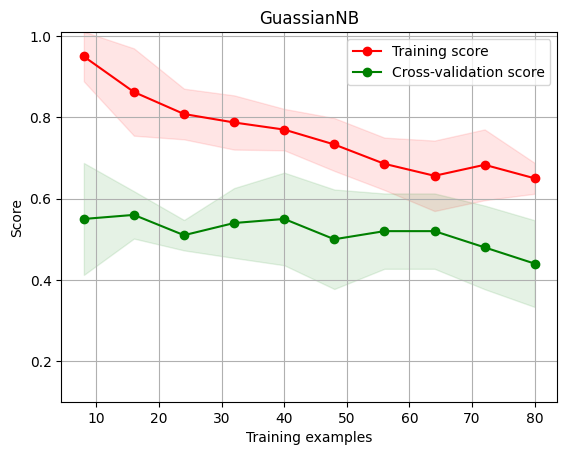

In [42]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
title ='GuassianNB'
estimator = GaussianNB()
plot_learning_curve(estimator, title, X,y.astype(int), ylim=(0.10, 1.01), cv=cv, n_jobs=-1)
plt.show()

## **SGD Classifier**

In [43]:
clf = SGDClassifier(loss="log_loss", penalty="l2", max_iter=100, early_stopping=False, random_state=2)
clf.fit(X_train, y_train)

#predictions on Train & validation 
sgd_train_pred = clf.predict(X_train)
sgd_val_pred = clf.predict(X_val)
# Prediction on the test data
sgd_test_pred = clf.predict(X_test)
# Print classification report for train and validation sets
print("SGD Classifier - Train Classification Report:")
print(classification_report(y_train, sgd_train_pred, digits=4))
print("SGD Classifier - Test Classification Report:")
print(classification_report(y_test, sgd_test_pred, digits=4))

SGD Classifier - Train Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        48
           1     0.7222    0.5778    0.6420        45
           2     0.6607    0.7872    0.7184        47

    accuracy                         0.7929       140
   macro avg     0.7943    0.7883    0.7868       140
weighted avg     0.7968    0.7929    0.7904       140

SGD Classifier - Test Classification Report:
              precision    recall  f1-score   support

           0     0.9091    1.0000    0.9524        10
           1     0.6667    0.8000    0.7273        10
           2     0.7143    0.5000    0.5882        10

    accuracy                         0.7667        30
   macro avg     0.7633    0.7667    0.7560        30
weighted avg     0.7633    0.7667    0.7560        30



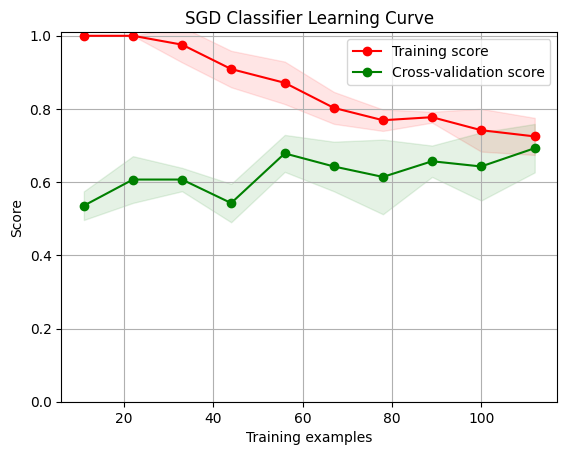

In [44]:
# apply learning curve function to SGD Classifier
plot_learning_curve(
    clf, 
    "SGD Classifier Learning Curve", 
    X_train, y_train, 
    ylim=(0.0, 1.01), 
    cv=StratifiedKFold(n_splits=5), 
    n_jobs=-1
)
plt.show()

## **SVM - Support Vector Machines**

In [45]:
#Create a svm Classifier
clf = svm.SVC(random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_grid = {"kernel":['linear','sigmoid', 'rbf','poly'],
            "C":[0.01,0.1,1,10],
            "gamma":['auto'],
            "degree":[0,1,2,3,4,5,6]
            }

svm = GridSearchCV(clf, param_grid=svm_grid, cv=kfold)

#Train the model using the training sets
svm.fit(X_train, y_train)
print(svm.best_params_)

#predicting on train & validation 
y_train_pred = svm.predict(X_train)
y_val_pred = svm.predict(X_val)
# Prediction on the test data
y_test_pred = svm.predict(X_test)
# Print classification report for train and validation sets
print("SVM - Train Classification Report:")
print(classification_report(y_train, y_train_pred, digits=4))
print("SVM - Test Classification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

{'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
SVM - Train Classification Report:
              precision    recall  f1-score   support

           0     0.9796    1.0000    0.9897        48
           1     0.9375    1.0000    0.9677        45
           2     1.0000    0.9149    0.9556        47

    accuracy                         0.9714       140
   macro avg     0.9724    0.9716    0.9710       140
weighted avg     0.9729    0.9714    0.9712       140

SVM - Test Classification Report:
              precision    recall  f1-score   support

           0     0.9091    1.0000    0.9524        10
           1     0.6429    0.9000    0.7500        10
           2     0.8000    0.4000    0.5333        10

    accuracy                         0.7667        30
   macro avg     0.7840    0.7667    0.7452        30
weighted avg     0.7840    0.7667    0.7452        30



## **Random Forrest**

### WARNING: the cell below takes between 1-3 minutes

In [46]:
clf_rf = RandomForestClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {"n_estimators":[100, 200, 500],
              "criterion":['gini','entropy'],
              "max_depth" : [5,10, 20, None], 
              "max_features" : [4,6,8,12,16],
              "oob_score" :[True]
              }

rf_grid = GridSearchCV(clf_rf, param_grid=param_grid, cv=kfold)

# Train the model using the training sets
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
# Predicting on train & validation
rf_train_pred = rf_grid.predict(X_train)
rf_val_pred = rf_grid.predict(X_val)
# Prediction on the test data
rf_test_pred = rf_grid.predict(X_test)
# Print classification report for train and test sets
print("Random Forest - Train Classification Report:")
print(classification_report(y_train, rf_train_pred, digits=4))
print("Random Forest - Test Classification Report:")
print(classification_report(y_test, rf_test_pred, digits=4))

{'criterion': 'gini', 'max_depth': 20, 'max_features': 4, 'n_estimators': 200, 'oob_score': True}
Random Forest - Train Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        48
           1     1.0000    1.0000    1.0000        45
           2     1.0000    1.0000    1.0000        47

    accuracy                         1.0000       140
   macro avg     1.0000    1.0000    1.0000       140
weighted avg     1.0000    1.0000    1.0000       140

Random Forest - Test Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     0.6923    0.9000    0.7826        10
           2     0.8571    0.6000    0.7059        10

    accuracy                         0.8333        30
   macro avg     0.8498    0.8333    0.8295        30
weighted avg     0.8498    0.8333    0.8295        30



## **XGBoost**

In [47]:
xgb = xgb.XGBRFClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {"n_estimators" : [75,100,150],
              "max_depth" : [5,6,7,8],
              "colsample_bytree":[0.7,0.8,0.4,0.5],
              "learning_rate": [0.10,.15,0.02,0.001,0.01,0.1],
              "subsample":[0.8,0.6,0.5],
              "objective" :['binary:logistic']}

xg_grid = GridSearchCV(xgb, param_grid=param_grid, n_jobs=-1, cv=kfold)

# Train the model using the training sets
xg_grid.fit(X_train,y_train)
print(xg_grid.best_params_)

# Predicting on train & validation
xg_train_pred = xg_grid.predict(X_train)
xg_val_pred = xg_grid.predict(X_val)
# Prediction on the test data
xg_test_pred = xg_grid.predict(X_test)
# Print classification report for train and test sets
print("XGBoost - Train Classification Report:")
print(classification_report(y_train, xg_train_pred, digits=4))
print("XGBoost - Test Classification Report:")
print(classification_report(y_test, xg_test_pred, digits=4))


{'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'objective': 'binary:logistic', 'subsample': 0.8}
XGBoost - Train Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        48
           1     1.0000    1.0000    1.0000        45
           2     1.0000    1.0000    1.0000        47

    accuracy                         1.0000       140
   macro avg     1.0000    1.0000    1.0000       140
weighted avg     1.0000    1.0000    1.0000       140

XGBoost - Test Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     0.7273    0.8000    0.7619        10
           2     0.7778    0.7000    0.7368        10

    accuracy                         0.8333        30
   macro avg     0.8350    0.8333    0.8329        30
weighted avg     0.8350    0.8333    0.8329        30



## **Multi Layer Perceptron - Neural Network**

In [48]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42, tol=1e-9)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'activation': ['relu', 'tanh'],  
    'hidden_layer_sizes': [(50,), (100,), (50,25)],  
    'max_iter': [500, 1000, 2000, 5000],                     
    'solver': ['adam'],                                 
    'learning_rate_init': [0.001, 0.01, 0.1],           # Control learning rate
    'early_stopping': [True],                           # Stop when not improving
    'validation_fraction': [0.405],                     # For early stopping
    'alpha': [0.00001, 0.0001, 0.001]                   # Regularization
}

mlp_grid = GridSearchCV(mlp, param_grid=param_grid, n_jobs=-1, cv=kfold)
# Train the model using the training sets
mlp_grid.fit(X_train, y_train)
print(mlp_grid.best_params_)
# Predicting on train & validation
mlp_train_pred = mlp_grid.predict(X_train)
mlp_val_pred = mlp_grid.predict(X_val)
# Prediction on the test data
mlp_test_pred = mlp_grid.predict(X_test)
# Print classification report for train and test sets
print("MLP - Train Classification Report:")
print(classification_report(y_train, mlp_train_pred, digits=4))
print("MLP - Test Classification Report:")
print(classification_report(y_test, mlp_test_pred, digits=4))

{'activation': 'relu', 'alpha': 1e-05, 'early_stopping': True, 'hidden_layer_sizes': (50, 25), 'learning_rate_init': 0.1, 'max_iter': 500, 'solver': 'adam', 'validation_fraction': 0.405}
MLP - Train Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.8958    0.9451        48
           1     0.8667    0.8667    0.8667        45
           2     0.7885    0.8723    0.8283        47

    accuracy                         0.8786       140
   macro avg     0.8850    0.8783    0.8800       140
weighted avg     0.8861    0.8786    0.8807       140

MLP - Test Classification Report:
              precision    recall  f1-score   support

           0     0.9000    0.9000    0.9000        10
           1     0.8000    0.8000    0.8000        10
           2     0.7000    0.7000    0.7000        10

    accuracy                         0.8000        30
   macro avg     0.8000    0.8000    0.8000        30
weighted avg     0.8000    0.8000    

# **Principal Component Analysis (PCA)**

In [49]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

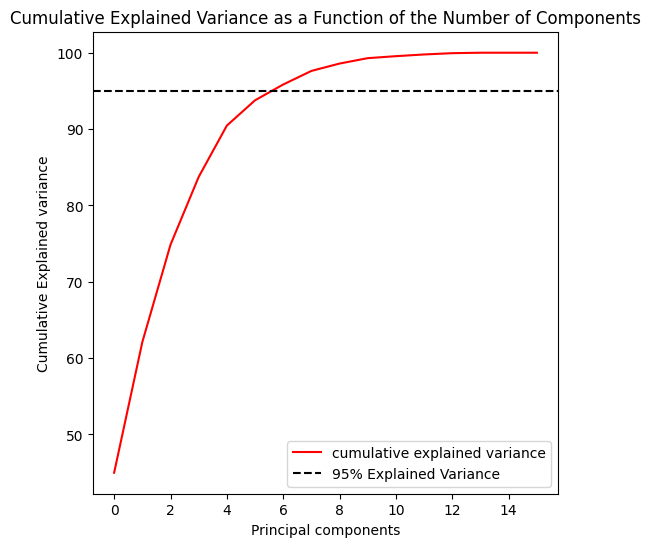

In [50]:
pca = PCA()

# Fit PCA on the training data
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(6,6))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

## **Logistic Regression with PCA**

In [51]:
# Create a pipeline with scaling, PCA, and logistic regression
pca_logmodel = Pipeline([
    ('pca', PCA(n_components=3)),                                               
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced')) 
])

# Fit the pipeline to training data
pca_logmodel.fit(X_train, y_train)

# Make predictions
log_train_pred = pca_logmodel.predict(X_train)
log_val_pred = pca_logmodel.predict(X_val)
log_test_pred = pca_logmodel.predict(X_test)

# Print classification reports
print("Logistic Regression with PCA - Train Classification Report:")
print(classification_report(y_train, log_train_pred, digits=4))
print("Logistic Regression with PCA - Test Classification Report:")
print(classification_report(y_test, log_test_pred, digits=4))

Logistic Regression with PCA - Train Classification Report:
              precision    recall  f1-score   support

           0     0.7869    1.0000    0.8807        48
           1     0.5750    0.5111    0.5412        45
           2     0.6154    0.5106    0.5581        47

    accuracy                         0.6786       140
   macro avg     0.6591    0.6739    0.6600       140
weighted avg     0.6612    0.6786    0.6633       140

Logistic Regression with PCA - Test Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     0.6667    0.6000    0.6316        10
           2     0.6364    0.7000    0.6667        10

    accuracy                         0.7667        30
   macro avg     0.7677    0.7667    0.7661        30
weighted avg     0.7677    0.7667    0.7661        30



## **Gaussian Naïve Bayes with PCA**

In [52]:
# Pipeline with parameter tuning
nb_pipeline = Pipeline([
    ('pca', PCA()),
    ('classifier', GaussianNB())
])

# Parameter grid (limited options for Gaussian NB)
param_grid = {
    'pca__n_components': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15,16],
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

nb_grid = GridSearchCV(
    nb_pipeline,
    param_grid,
    cv=5,
    scoring='f1_macro'
)

nb_grid.fit(X_train, y_train)
print("Best parameters:", nb_grid.best_params_)

# Use best model
best_nb = nb_grid.best_estimator_
val_pred = best_nb.predict(X_val)

# Print classification report for train set
print("Naive Bayes with PCA - Train Classification Report:")
print(classification_report(y_train, best_nb.predict(X_train), digits=4))
print("Naive Bayes with PCA - Test Classification Report:")
print(classification_report(y_test, best_nb.predict(X_test), digits=4))

Best parameters: {'classifier__var_smoothing': 1e-09, 'pca__n_components': 11}
Naive Bayes with PCA - Train Classification Report:
              precision    recall  f1-score   support

           0     0.9783    0.9375    0.9574        48
           1     0.7200    0.8000    0.7579        45
           2     0.7500    0.7021    0.7253        47

    accuracy                         0.8143       140
   macro avg     0.8161    0.8132    0.8135       140
weighted avg     0.8186    0.8143    0.8154       140

Naive Bayes with PCA - Test Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9000    0.9474        10
           1     0.7273    0.8000    0.7619        10
           2     0.7000    0.7000    0.7000        10

    accuracy                         0.8000        30
   macro avg     0.8091    0.8000    0.8031        30
weighted avg     0.8091    0.8000    0.8031        30



## **SGD Classifier with PCA**

In [53]:
# SGD Classifier with PCA
sgd_pipeline = Pipeline([
    ('pca', PCA(n_components=16)),
    ('classifier', SGDClassifier(loss="log_loss", penalty="l2", max_iter=1000))
])

# Fit the pipeline to training data
sgd_pipeline.fit(X_train, y_train)
# Make predictions
sgd_train_pred = sgd_pipeline.predict(X_train)
sgd_val_pred = sgd_pipeline.predict(X_val)
sgd_test_pred = sgd_pipeline.predict(X_test)
# Print classification reports
print("SGD Classifier with PCA - Train Classification Report:")
print(classification_report(y_train, sgd_train_pred, digits=4))
print("SGD Classifier with PCA - Test Classification Report:")
print(classification_report(y_test, sgd_test_pred, digits=4))



SGD Classifier with PCA - Train Classification Report:
              precision    recall  f1-score   support

           0     0.9600    1.0000    0.9796        48
           1     0.6604    0.7778    0.7143        45
           2     0.7297    0.5745    0.6429        47

    accuracy                         0.7857       140
   macro avg     0.7834    0.7841    0.7789       140
weighted avg     0.7864    0.7857    0.7813       140

SGD Classifier with PCA - Test Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     0.6923    0.9000    0.7826        10
           2     0.8571    0.6000    0.7059        10

    accuracy                         0.8333        30
   macro avg     0.8498    0.8333    0.8295        30
weighted avg     0.8498    0.8333    0.8295        30



## **Support Vector Machines (SVM) with PCA**

In [54]:

# Consider PCA with SVM - test both
svm_pipeline = Pipeline([
    ('pca', PCA(n_components=16)),  # Adjust n_components as needed
    ('classifier', SVC(kernel='rbf', C=10))  #
])

# Fit the pipeline to training data
svm_pipeline.fit(X_train, y_train)
# Make predictions
svm_train_pred = svm_pipeline.predict(X_train)
svm_val_pred = svm_pipeline.predict(X_val)
svm_test_pred = svm_pipeline.predict(X_test)
# Print classification reports
print("SVM with PCA - Train Classification Report:")
print(classification_report(y_train, svm_train_pred, digits=4))
print("SVM with PCA - Test Classification Report:")
print(classification_report(y_test, svm_test_pred, digits=4))

# show amount of PCA components
pca = svm_pipeline.named_steps['pca']
print(f"Number of PCA components: {pca.n_components_}")

SVM with PCA - Train Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        48
           1     0.9565    0.9778    0.9670        45
           2     0.9783    0.9574    0.9677        47

    accuracy                         0.9786       140
   macro avg     0.9783    0.9784    0.9783       140
weighted avg     0.9787    0.9786    0.9786       140

SVM with PCA - Test Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     0.7692    1.0000    0.8696        10
           2     1.0000    0.7000    0.8235        10

    accuracy                         0.9000        30
   macro avg     0.9231    0.9000    0.8977        30
weighted avg     0.9231    0.9000    0.8977        30

Number of PCA components: 16


## **Random Forrest with PCA**

In [55]:
# Consider PCA with Random Forest
rf_pipeline = Pipeline([
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])

# Fit the pipeline to training data
rf_pipeline.fit(X_train, y_train)
# Make predictions
rf_train_pred = rf_pipeline.predict(X_train)
rf_val_pred = rf_pipeline.predict(X_val)
rf_test_pred = rf_pipeline.predict(X_test)

# print the number of PCA components used
pca = rf_pipeline.named_steps['pca']
print(f"Number of PCA components used in Random Forest: {pca.n_components_}")

# Print classification reports
print("Random Forest with PCA - Train Classification Report:")
print(classification_report(y_train, rf_train_pred, digits=4))
print("Random Forest with PCA - Test Classification Report:")
print(classification_report(y_test, rf_test_pred, digits=4))


Number of PCA components used in Random Forest: 16
Random Forest with PCA - Train Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        48
           1     1.0000    1.0000    1.0000        45
           2     1.0000    1.0000    1.0000        47

    accuracy                         1.0000       140
   macro avg     1.0000    1.0000    1.0000       140
weighted avg     1.0000    1.0000    1.0000       140

Random Forest with PCA - Test Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     0.8000    0.8000    0.8000        10
           2     0.8000    0.8000    0.8000        10

    accuracy                         0.8667        30
   macro avg     0.8667    0.8667    0.8667        30
weighted avg     0.8667    0.8667    0.8667        30



## **XGBoost with PCA**

In [56]:
from xgboost import XGBClassifier
# Create pipeline
xgb_pipeline = Pipeline([
    ('pca', PCA()),
    ('classifier', XGBClassifier())
])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {
    "pca__n_components": [5, 6, 7, 8, 9, 10],
    "classifier__n_estimators": [50, 100],
    "classifier__max_depth": [3, 6, 9],
    "classifier__learning_rate": [0.1, 0.01],
    "classifier__subsample": [0.8, 1.0]
}

xg_grid = GridSearchCV(xgb_pipeline, param_grid=param_grid, n_jobs=-1, cv=kfold)

# Train the model using the training sets
xg_grid.fit(X_train, y_train)
print(xg_grid.best_params_)

# Predicting on train & validation
xg_train_pred = xg_grid.predict(X_train)
xg_val_pred = xg_grid.predict(X_val)
# Prediction on the test data
xg_test_pred = xg_grid.predict(X_test)

# Print classification report for train and test sets
print("XGBoost - Train Classification Report:")
print(classification_report(y_train, xg_train_pred, digits=4))
print("XGBoost - Test Classification Report:")
print(classification_report(y_test, xg_test_pred, digits=4))

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 50, 'classifier__subsample': 0.8, 'pca__n_components': 6}
XGBoost - Train Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        48
           1     1.0000    1.0000    1.0000        45
           2     1.0000    1.0000    1.0000        47

    accuracy                         1.0000       140
   macro avg     1.0000    1.0000    1.0000       140
weighted avg     1.0000    1.0000    1.0000       140

XGBoost - Test Classification Report:
              precision    recall  f1-score   support

           0     0.9091    1.0000    0.9524        10
           1     0.7273    0.8000    0.7619        10
           2     0.8750    0.7000    0.7778        10

    accuracy                         0.8333        30
   macro avg     0.8371    0.8333    0.8307        30
weighted avg     0.8371    0.8333    0.8307        30



## **Multi Layer Perceptron - Neural Netwrok - with PCA**

In [57]:
mlp_pipeline = Pipeline([
    ('pca', PCA()),
    ('classifier', MLPClassifier(random_state=42, tol=1e-9))
])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'pca__n_components': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'classifier__activation': ['relu', 'tanh'],
    'classifier__hidden_layer_sizes': [(50,), (100,), (50,25)],
    'classifier__max_iter': [500, 1000, 2000, 5000],
    'classifier__solver': ['adam'],
    'classifier__learning_rate_init': [0.001, 0.01, 0.1],
    'classifier__early_stopping': [True],
    'classifier__validation_fraction': [0.1],
    'classifier__alpha': [0.00001, 0.0001, 0.001]
}


mlp_grid = GridSearchCV(mlp_pipeline, param_grid=param_grid, n_jobs=-1, cv=kfold)
# Train the model using the training sets
mlp_grid.fit(X_train, y_train)
print(mlp_grid.best_params_)
# Predicting on train & validation
mlp_train_pred = mlp_grid.predict(X_train)
mlp_val_pred = mlp_grid.predict(X_val)
# Prediction on the test data
mlp_test_pred = mlp_grid.predict(X_test)
# Print classification report for train and test sets
print("MLP - Train Classification Report:")
print(classification_report(y_train, mlp_train_pred, digits=4))
print("MLP - Test Classification Report:")
print(classification_report(y_test, mlp_test_pred, digits=4))

{'classifier__activation': 'relu', 'classifier__alpha': 1e-05, 'classifier__early_stopping': True, 'classifier__hidden_layer_sizes': (50, 25), 'classifier__learning_rate_init': 0.1, 'classifier__max_iter': 500, 'classifier__solver': 'adam', 'classifier__validation_fraction': 0.1, 'pca__n_components': 11}
MLP - Train Classification Report:
              precision    recall  f1-score   support

           0     0.9796    1.0000    0.9897        48
           1     0.7647    0.8667    0.8125        45
           2     0.8500    0.7234    0.7816        47

    accuracy                         0.8643       140
   macro avg     0.8648    0.8634    0.8613       140
weighted avg     0.8670    0.8643    0.8629       140

MLP - Test Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     0.7500    0.9000    0.8182        10
           2     0.8750    0.7000    0.7778        10

    accuracy              